# Step 1: Import required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 2: Load the dataset from TensorFlow Datasets

In [ ]:
import tensorflow_datasets as tfds
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],     # splitting the dataset into 80% training and 20% validation.
    shuffle_files=True,
    as_supervised=True,    #(cat_picture, 0) or (dog_picture, 1)
    with_info=True
)

# Step 3: Resize and normalize the images

Goal: Make all images the same size and easier to learn from by the model.

In [ ]:
IMG_SIZE = 128    #all images to 128 x 128 pixels.
BATCH_SIZE = 32     #very training step will use 32 images at a time.

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0     #normalization and helps the model train better and faster.-->Dividing by 255 makes values range from 0.0 to 1.0.
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(1)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(1)

 # Step 4 :Define the CNN (Convolutional Neural Network)

Sequential model (one layer after another)

In [ ]:
model = Sequential([
    # 1st Conv Block : Detect simple features like edges or color blobs
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    # 2nd Conv Block : Learn higher-level features than the first layer.
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # 3rd Conv Block : Recognize full shapes or objects in deeper layers
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification : Give a final prediction — either class 0 or 1.
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 5: Compile the model

In [ ]:
model.compile(optimizer='adam',     # Works well for most problems, including CNNs for image classification.
              loss='binary_crossentropy',      #Binary Crossentropy is the loss function used for binary classification (2 classes).
              metrics=['accuracy'])         #Tells the model to track and report accuracy after each epoch.

# Step 6: Train the model

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=5)
#The .fit() function returns a History object . This object contains the loss and accuracy values for each epoch.

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.6180 - loss: 0.6460 - val_accuracy: 0.7732 - val_loss: 0.4867
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.7618 - loss: 0.4951 - val_accuracy: 0.8007 - val_loss: 0.4286
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.8197 - loss: 0.4004 - val_accuracy: 0.8138 - val_loss: 0.4061
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8502 - loss: 0.3395 - val_accuracy: 0.8371 - val_loss: 0.3722
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8818 - loss: 0.2744 - val_accuracy: 0.8356 - val_loss: 0.4090


# Step 7: Plot Training and Validation Accuracy

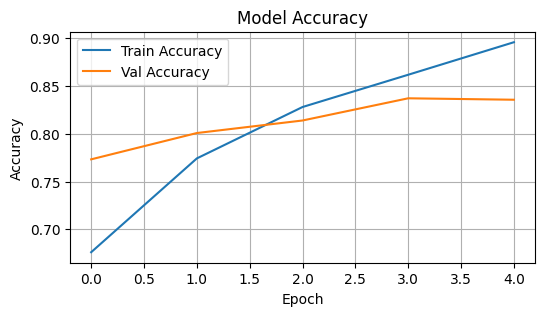

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Plot Training and Validation Loss

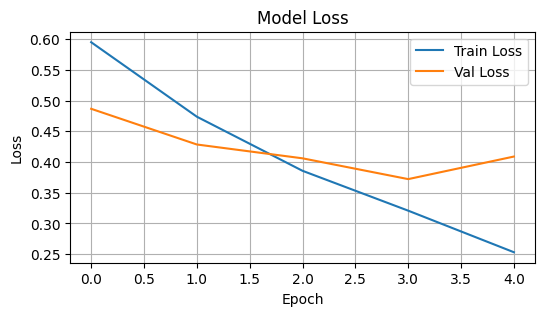

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#Step 9: Upload the File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kutta.jpg to kutta (2).jpg


#Step 10:  Load and preprocess an image to feed into your trained CNN model

In [ ]:
from tensorflow.keras.preprocessing import image

# STEP 1: Get image path from uploaded files
img_path = list(uploaded.keys())[0]

# STEP 2: Load and resize the image
img = image.load_img(img_path, target_size=(128, 128))

# STEP 3: Convert image to a numerical array
img_array = image.img_to_array(img)

# STEP 4: Normalize pixel values to 0–1
img_array = img_array / 255.0

# STEP 5: Add batch dimension (1, 128, 128, 3)
img_array = np.expand_dims(img_array, axis=0)


# Step 11: Prediction

In [ ]:
prediction = model.predict(img_array)
if prediction[0] < 0.5:
    print("It's a CAT 🐱 with confidence:", 1 - prediction[0][0])
else:
    print("It's a DOG 🐶 with confidence:", prediction[0][0])
#Confidence is the model’s estimated probability that its prediction is correct.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
It's a DOG 🐶 with confidence: 0.9758187


#Step 12: Showing the image

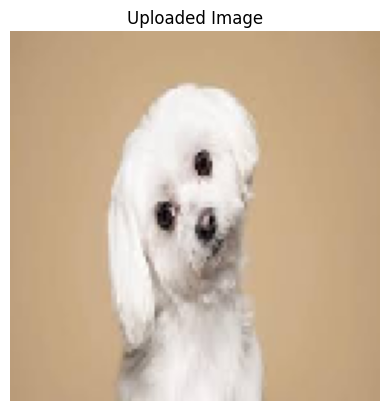

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 01.jpg to 01 (2).jpg


In [ ]:
from tensorflow.keras.preprocessing import image
# Change this to the name of your uploaded image file
img_path = list(uploaded.keys())[0]
# Load and preprocess
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

In [ ]:
prediction = model.predict(img_array)
if prediction[0] < 0.5:
    print("It's a CAT 🐱 with confidence:", 1 - prediction[0][0])
else:
    print("It's a DOG 🐶 with confidence:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
It's a DOG 🐶 with confidence: 0.99799925


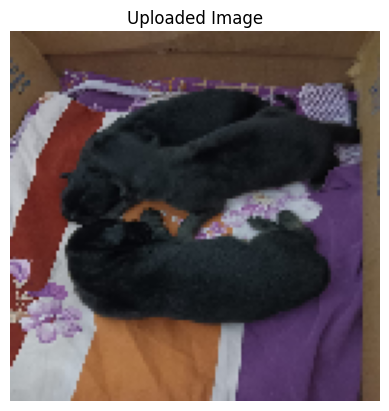

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving billi2.jpg to billi2 (1).jpg


In [ ]:
from tensorflow.keras.preprocessing import image
# Change this to the name of your uploaded image file
img_path = list(uploaded.keys())[0]
# Load and preprocess
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

In [ ]:
prediction = model.predict(img_array)
if prediction[0] < 0.5:
    print("It's a CAT 🐱 with confidence:", 1 - prediction[0][0])
else:
    print("It's a DOG 🐶 with confidence:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
It's a CAT 🐱 with confidence: 0.94484526


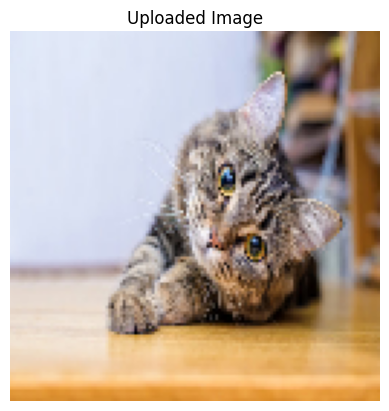

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving billi.jpg to billi (1).jpg


In [ ]:
from tensorflow.keras.preprocessing import image
# Change this to the name of your uploaded image file
img_path = list(uploaded.keys())[0]
# Load and preprocess
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

In [ ]:
prediction = model.predict(img_array)
if prediction[0] < 0.5:
    print("It's a CAT 🐱 with confidence:", 1 - prediction[0][0])
else:
    print("It's a DOG 🐶 with confidence:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
It's a CAT 🐱 with confidence: 0.98359674


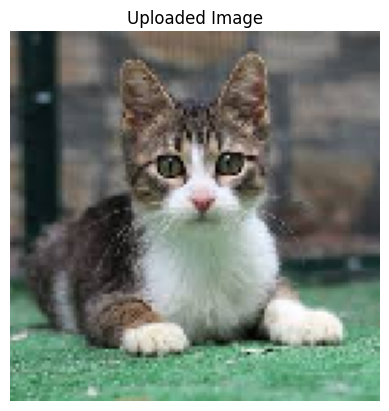

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# Step 13 : Saving the file

In [ ]:
model.save("cat_dog_model.keras")

# Step 14: Downloading the file

In [ ]:
from google.colab import files
files.download("cat_dog_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Step 15 : Summarizing the model

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("cat_dog_model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,817,989 (148.08 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,878,660 (98.72 MB)